# North Sea production visualization

This notebook contains code for cleaning data downloaded from the internet containing monthly production per field in UK and Norway side of North Sea. 

* UK: https://data-ogauthority.opendata.arcgis.com/datasets/oga-field-production-pprs-wgs84

* Norway: http://factpages.npd.no/factpages/Default.aspx?culture=en&nav1=field&nav2=TableView%7CProduction%7CSaleable%7CMonthly

The cleaned data is finally combined and visualized using the open-source geospatial data visualization web-service https://uber.github.io/kepler.gl/#/ 


The following resources have been also used:

* Find Latitude and Longitude of UK fields: https://en.wikipedia.org/wiki/List_of_oil_and_gas_fields_of_the_North_Sea#United_Kingdom

* Find Latitude and Longitude of Norwegian fields: http://factpages.npd.no/factpages/default.aspx?culture=nb-no&nav1=field&nav2=PageView|All&nav3=2845712

* Make videos: https://www.macworld.co.uk/how-to/mac-software/how-record-screen-on-your-mac-3527168/

* Convert to mpeg and GIF: http://www.convertfiles.com + https://cloudconvert.com/mpeg-to-gif + http://swift.logdown.com/posts/286503-tricks-and-tips-how-to-add-a-demo-video-in-your-git-readmemd-without-adding-files-to-the-repository-or-hosting-files-elsewhere-online

In [1]:
import os
import glob
from datetime import datetime,date

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

# Figures inline and set visualization style
%matplotlib inline
sns.set()
sns.set_style("whitegrid")

## Data loading

In [2]:
df_UK = pd.read_csv('Data/UKCS_Production.csv', encoding='latin-1')
df_UK.fillna(0., inplace=True)

display(df_UK.head(5))

/Users/matteoravasi/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,FIELDNAME,FIELDAREA,UNITNAME,UNITTYPCOD,UNITTYPDES,LOCATION,PERIODDATE,PERIODYRMN,PERIODMNTH,...,GCONDVOL,GCONDMBD,GCONDDEN,INJWATMASS,INJWATVOL,INJWATMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,ORGGRPNM
0,1,ALBA,CNS,ALBA,OTL,Offshore Tanker Loader,Offshore,1994-03-15T00:00:00.000Z,199403,3,...,0.0,0.0,0.0,74078.0,74078.0,15.030665,2192.0,2192.0,0.444764,CHEVRON CORPORATION
1,2,ALBA,CNS,ALBA,OTL,Offshore Tanker Loader,Offshore,1994-04-15T00:00:00.000Z,199404,4,...,0.0,0.0,0.0,217307.0,217307.0,45.562034,25516.0,25516.0,5.349855,CHEVRON CORPORATION
2,3,ALBA,CNS,ALBA,OTL,Offshore Tanker Loader,Offshore,1994-05-15T00:00:00.000Z,199405,5,...,0.0,0.0,0.0,334098.0,334098.0,67.789562,23496.0,23496.0,4.767414,CHEVRON CORPORATION
3,4,ALBA,CNS,ALBA,OTL,Offshore Tanker Loader,Offshore,1994-06-15T00:00:00.000Z,199406,6,...,0.0,0.0,0.0,297500.0,297500.0,62.375833,24628.0,24628.0,5.163671,CHEVRON CORPORATION
4,5,ALBA,CNS,ALBA,OTL,Offshore Tanker Loader,Offshore,1994-07-15T00:00:00.000Z,199407,7,...,0.0,0.0,0.0,321721.0,321721.0,65.278229,51591.0,51591.0,10.467980,CHEVRON CORPORATION


In [3]:
df_Nor = pd.read_csv('Data/NCS_Production.csv', encoding='utf-8')
#df_Nor.fillna(0., inplace=True)

display(df_Nor.head(5))

,prfInformationCarrier,prfYear,prfMonth,prfPrdOilGrossMillSm3,prfPrdGasGrossBillSm3,prfPrdCondensateGrossMillSm3,prfPrdOeGrossMillSm3,prfPrdProducedWaterInFieldMillSm3,prfNpdidInformationCarrier
0,33/9-6 DELTA,2009,7,0.00070,0.00011,0.0,0.00081,0.00051,44576
1,33/9-6 DELTA,2009,8,0.00292,0.00047,0.0,0.00339,0.00063,44576
2,33/9-6 DELTA,2009,9,0.00338,0.00054,0.0,0.00392,0.00316,44576
3,33/9-6 DELTA,2009,10,0.00312,0.00050,0.0,0.00362,0.00535,44576
4,33/9-6 DELTA,2009,11,0.00000,0.00000,0.0,0.00000,0.00000,44576


## Fields extraction

Extract all fields and save them to file

In [4]:
fields = df_UK['FIELDNAME'].unique()
print(fields)

#df_UK_position = pd.DataFrame({'FIELDNAME':fields, 
#                               'LAT':np.zeros(len(fields)),
#                               'LON':np.zeros(len(fields))})
#df_UK_position.to_csv('Data/Fields_UKCS.csv', encoding='latin-1')
#df_UK_position.to_excel('Data/Fields_UKCS.xls', encoding='latin-1')

[u'ALBA' u'AFFLECK' u'ANDREW' u'ALMA' u'ALDER' u'ANGUS' u'ARBROATH'
 u'ARGYLL' u'ARDMORE' u'AUK' u'ATHENA' u'ATLANTIC' u'ARKWRIGHT' u'BANFF'
 u'BEATRICE' u'BALMORAL' u'BARDOLINO' u'AUK NORTH' u'BACCHUS' u'AVIAT'
 u'BALLOCH' u'BEINN' u'BLAKE' u'BRAE-CENTRAL [Part of BRAE]' u'BIRCH'
 u'BITTERN' u'BEAULY' u'BLACKBIRD' u'BLADON' u'BLENHEIM' u'BLANE' u'BLAIR'
 u'BRAE-NORTH [Part of BRAE]' u'BRAE-SOUTH [Part of BRAE]' u'BRAEMAR'
 u'BRIMMOND' u'BRENDA' u'BRITANNIA' u'BRECHIN' u'BRODGAR' u'BURGHLEY'
 u'CALLANISH' u'CAPTAIN' u'CARNOUSTIE' u'BUCHAN' u'CALEDONIA' u'CHANTER'
 u'BUZZARD' u'BURGMAN' u'CATCHER' u'CAYLEY' u'CLAPHAM' u'CLAYMORE'
 u'CHESTNUT' u'CLYDE' u'CURLEW B + D' u'CROMARTY' u'COOK' u'CRATHES'
 u'DUNCAN' u'EAST BRAE' u'DONAN [MAERSK]' u'EGRET' u'CURLEW C' u'DRAKE'
 u'DUART' u'DAUNTLESS' u'DONAN' u'ELGIN' u'CYRUS' u'DURWARD' u'FIFE'
 u'FORTIES' u'EVEREST' u'FLORA' u'FERGUS' u'ERSKINE' u'ENOCHDHU' u'FLEMING'
 u'ENOCH' u'FLYNDRE' u'FARRAGON' u'ETTRICK' u'FULMAR' u'GADWALL'
 u'GANNET A'

In [5]:
df_Nor.rename(columns={'prfInformationCarrier': 'FIELDNAME'}, inplace=True)

fields = list(df_Nor['FIELDNAME'].unique())
print(fields)

#df_Nor_position = pd.DataFrame({'FIELDNAME':[field.encode('utf8') for field in fields], 
#                                'LAT':np.zeros(len(fields)), 
#                                'LON':np.zeros(len(fields))})
#df_Nor_position.to_csv('Data/Fields_NCS.csv', encoding='latin-1')

#df_Nor_position = pd.DataFrame({'FIELDNAME':fields, 
#                                'LAT':np.zeros(len(fields)), 
#                                'LON':np.zeros(len(fields))})
#df_Nor_position.to_excel('Data/Fields_NCS.xls', encoding='latin-1')

[u'33/9-6 DELTA', u'ALBUSKJELL', u'ALVE', u'ALVHEIM', u'ATLA', u'BALDER', u'BLANE', u'BRAGE', u'BRYNHILD', u'BYRDING', u'B\xd8YLA', u'COD', u'DRAUGEN', u'EDDA', u'EDVARD GRIEG', u'EKOFISK', u'ELDFISK', u'EMBLA', u'ENOCH', u'FLYNDRE', u'FRAM', u'FRAM H-NORD', u'FRIGG', u'FR\xd8Y', u'GAUPE', u'GIMLE', u'GINA KROG', u'GJ\xd8A', u'GLITNE', u'GOLIAT', u'GRANE', u'GUDRUN', u'GULLFAKS', u'GULLFAKS S\xd8R', u'GUNGNE', u'GYDA', u'HEIDRUN', u'HEIMDAL', u'HOD', u'HULDRA', u'HYME', u'ISLAY', u'IVAR AASEN', u'JETTE', u'JOTUN', u'KNARR', u'KRISTIN', u'KVITEBJ\xd8RN', u'LILLE-FRIGG', u'MARIA', u'MARULK', u'MIKKEL', u'MIME', u'MORVIN', u'MURCHISON', u'NJORD', u'NORD\xd8ST FRIGG', u'NORNE', u'ODIN', u'ORMEN LANGE', u'OSEBERG', u'OSEBERG S\xd8R', u'OSEBERG \xd8ST', u'OSELVAR', u'REV', u'RINGHORNE \xd8ST', u'SIGYN', u'SINDRE', u'SKARV', u'SKIRNE', u'SKULD', u'SLEIPNER VEST', u'SLEIPNER \xd8ST', u'SNORRE', u'SN\xd8HVIT', u'STATFJORD', u'STATFJORD NORD', u'STATFJORD \xd8ST', u'SVALIN', u'SYGNA', u'TAMBAR',

Read file with fields and location (lat-long) and join to main dataframe

In [6]:
df_UK_position = pd.read_excel('Data/Fields_UKCS.xls', index_col=0, encoding='latin-1')
df_UK          = df_UK.merge(df_UK_position)

df_Nor_position = pd.read_excel('Data/Fields_NCS.xls', index_col=0, encoding='latin-1')
df_Nor          = df_Nor.merge(df_Nor_position)

# get only data that have latitute
df_UK  = df_UK[df_UK.LAT!=0]
df_Nor = df_Nor[df_Nor.LAT!=0]

print(df_UK.FIELDNAME.unique())
print(df_Nor.FIELDNAME.unique())

display(df_UK.head(5))
display(df_Nor.head(5))

[u'ALBA' u'ANDREW' u'AUK' u'BRAE-CENTRAL [Part of BRAE]' u'BLANE'
 u'BRAE-NORTH [Part of BRAE]' u'BRAE-SOUTH [Part of BRAE]' u'BUCHAN'
 u'DRAKE' u'ELGIN' u'CYRUS' u'FORTIES' u'EVEREST' u'FLEMING' u'FARRAGON'
 u'FULMAR' u'FRANKLIN' u'GOLDEN EAGLE' u'HAWKINS' u'MILLER' u'SEYMOUR'
 u'HARDING' u'KINNOULL' u'AMETHYST WEST' u'ANGLIA'
 u'LEMAN [PERENCO][pt. of LEMAN]' u'CLAIR-PHASE 1 [Part of CLAIR]']
[u'33/9-6 DELTA' u'ALBUSKJELL' u'ALVE' u'ALVHEIM' u'ATLA' u'BALDER'
 u'BLANE' u'BRAGE' u'BRYNHILD' u'BYRDING' u'B\xd8YLA' u'COD' u'DRAUGEN'
 u'EDDA' u'EDVARD GRIEG' u'EKOFISK' u'ELDFISK' u'EMBLA' u'ENOCH' u'FLYNDRE'
 u'FRAM' u'FRAM H-NORD' u'FRIGG' u'FR\xd8Y' u'GAUPE' u'GIMLE' u'GINA KROG'
 u'GJ\xd8A' u'GLITNE' u'GOLIAT' u'GRANE' u'GUDRUN' u'GULLFAKS'
 u'GULLFAKS S\xd8R' u'GUNGNE' u'GYDA' u'HEIDRUN' u'HEIMDAL' u'HOD'
 u'HULDRA' u'HYME' u'IVAR AASEN' u'JETTE' u'JOTUN' u'KNARR' u'KRISTIN'
 u'KVITEBJ\xd8RN' u'LILLE-FRIGG' u'MARIA' u'MARULK' u'MIKKEL' u'MIME'
 u'MORVIN' u'NJORD' u'NORD\xd8ST FRIGG' 

,OBJECTID,FIELDNAME,FIELDAREA,UNITNAME,UNITTYPCOD,UNITTYPDES,LOCATION,PERIODDATE,PERIODYRMN,PERIODMNTH,...,GCONDDEN,INJWATMASS,INJWATVOL,INJWATMBD,WATPRODMAS,WATPRODVOL,WATPRODMBD,ORGGRPNM,LAT,LON
0,1,ALBA,CNS,ALBA,OTL,Offshore Tanker Loader,Offshore,1994-03-15T00:00:00.000Z,199403,3,...,0.0,74078.0,74078.0,15.030665,2192.0,2192.0,0.444764,CHEVRON CORPORATION,58.05803,1.079633
1,2,ALBA,CNS,ALBA,OTL,Offshore Tanker Loader,Offshore,1994-04-15T00:00:00.000Z,199404,4,...,0.0,217307.0,217307.0,45.562034,25516.0,25516.0,5.349855,CHEVRON CORPORATION,58.05803,1.079633
2,3,ALBA,CNS,ALBA,OTL,Offshore Tanker Loader,Offshore,1994-05-15T00:00:00.000Z,199405,5,...,0.0,334098.0,334098.0,67.789562,23496.0,23496.0,4.767414,CHEVRON CORPORATION,58.05803,1.079633
3,4,ALBA,CNS,ALBA,OTL,Offshore Tanker Loader,Offshore,1994-06-15T00:00:00.000Z,199406,6,...,0.0,297500.0,297500.0,62.375833,24628.0,24628.0,5.163671,CHEVRON CORPORATION,58.05803,1.079633
4,5,ALBA,CNS,ALBA,OTL,Offshore Tanker Loader,Offshore,1994-07-15T00:00:00.000Z,199407,7,...,0.0,321721.0,321721.0,65.278229,51591.0,51591.0,10.467980,CHEVRON CORPORATION,58.05803,1.079633


,FIELDNAME,prfYear,prfMonth,prfPrdOilGrossMillSm3,prfPrdGasGrossBillSm3,prfPrdCondensateGrossMillSm3,prfPrdOeGrossMillSm3,prfPrdProducedWaterInFieldMillSm3,prfNpdidInformationCarrier,LAT,LON
0,33/9-6 DELTA,2009,7,0.00070,0.00011,0.0,0.00081,0.00051,44576,61.162,1.512
1,33/9-6 DELTA,2009,8,0.00292,0.00047,0.0,0.00339,0.00063,44576,61.162,1.512
2,33/9-6 DELTA,2009,9,0.00338,0.00054,0.0,0.00392,0.00316,44576,61.162,1.512
3,33/9-6 DELTA,2009,10,0.00312,0.00050,0.0,0.00362,0.00535,44576,61.162,1.512
4,33/9-6 DELTA,2009,11,0.00000,0.00000,0.0,0.00000,0.00000,44576,61.162,1.512


## Data cleaning

Change dates in UK (move day to 1)

In [7]:
def change_day_in_date(df):
    return df.PERIODDATE.replace(day=1)

df_UK.PERIODDATE = pd.to_datetime(df_UK.PERIODDATE)
df_UK.PERIODDATE = df_UK.apply(change_day_in_date, axis=1)

Create date column in Norway data

In [8]:
def create_date(df):
    return datetime(df['prfYear'],df['prfMonth'],1)
    
df_Nor['PERIODDATE'] = df_Nor.apply(create_date, axis=1)

Choose only needec columns and merge two datasets

In [9]:
df_UK = df_UK[['FIELDNAME', 'LAT', 'LON', 'PERIODDATE', 'OILPRODM3', 'AGASPROMMS', 'WATPRODVOL']]

df_UK.rename(columns={'OILPRODM3': 'Oil Production Volumes', 
                      'AGASPROMMS': 'Gas Production Volumes',
                      'WATPRODVOL': 'Water Production Volumes'}, inplace=True)
display(df_UK.head(5))

df_UK.to_csv('Data/UKCS_Production_cleaned.csv', index=False, encoding='latin-1')

,FIELDNAME,LAT,LON,PERIODDATE,Oil Production Volumes,Gas Production Volumes,Water Production Volumes
0,ALBA,58.05803,1.079633,1994-03-01,142134.0,6.691623,2192.0
1,ALBA,58.05803,1.079633,1994-04-01,166535.0,9.130105,25516.0
2,ALBA,58.05803,1.079633,1994-05-01,160681.0,9.311768,23496.0
3,ALBA,58.05803,1.079633,1994-06-01,198771.0,9.996499,24628.0
4,ALBA,58.05803,1.079633,1994-07-01,248810.0,12.571001,51591.0


In [10]:
df_Nor = df_Nor[['FIELDNAME', 'LAT', 'LON', 'PERIODDATE', 'prfPrdOilGrossMillSm3', 
                 'prfPrdGasGrossBillSm3', 'prfPrdProducedWaterInFieldMillSm3']]

df_Nor.rename(columns={'prfPrdOilGrossMillSm3': 'Oil Production Volumes', 
                       'prfPrdGasGrossBillSm3': 'Gas Production Volumes',
                       'prfPrdProducedWaterInFieldMillSm3': 'Water Production Volumes'}, 
              inplace=True)

# change units
df_Nor['Oil Production Volumes']= df_Nor['Oil Production Volumes']*1e6 
df_Nor['Gas Production Volumes']= df_Nor['Gas Production Volumes']*1e6 
df_Nor['Water Production Volumes']= df_Nor['Water Production Volumes']*1e6 

display(df_Nor.head(5))

df_Nor.to_csv('Data/NCS_Production_cleaned.csv', index=False, encoding='latin-1')

,FIELDNAME,LAT,LON,PERIODDATE,Oil Production Volumes,Gas Production Volumes,Water Production Volumes
0,33/9-6 DELTA,61.162,1.512,2009-07-01,700.0,110.0,510.0
1,33/9-6 DELTA,61.162,1.512,2009-08-01,2920.0,470.0,630.0
2,33/9-6 DELTA,61.162,1.512,2009-09-01,3380.0,540.0,3160.0
3,33/9-6 DELTA,61.162,1.512,2009-10-01,3120.0,500.0,5350.0
4,33/9-6 DELTA,61.162,1.512,2009-11-01,0.0,0.0,0.0


In [11]:
# Sort dates in ascending order 
df_UK  = df_UK.sort_values(['FIELDNAME','PERIODDATE'],ascending=True)
df_Nor = df_Nor.sort_values(['FIELDNAME','PERIODDATE'],ascending=True)

Merge production for common fields (fields that partially belong to UK and partially to Norway)

In [12]:
display((df_Nor[df_Nor.FIELDNAME=='BLANE']).sort_values(by='PERIODDATE', axis=0, ascending=True).head(10))
display((df_UK[df_UK.FIELDNAME=='BLANE']).sort_values(by='PERIODDATE', axis=0, ascending=True).head(10))

,FIELDNAME,LAT,LON,PERIODDATE,Oil Production Volumes,Gas Production Volumes,Water Production Volumes
810,BLANE,56.847683,2.498706,2007-05-01,0.0,0.0,0.0
811,BLANE,56.847683,2.498706,2007-06-01,0.0,0.0,0.0
812,BLANE,56.847683,2.498706,2007-07-01,0.0,0.0,0.0
813,BLANE,56.847683,2.498706,2007-08-01,0.0,0.0,0.0
814,BLANE,56.847683,2.498706,2007-09-01,8200.0,480.0,100.0
815,BLANE,56.847683,2.498706,2007-10-01,14350.0,850.0,70.0
816,BLANE,56.847683,2.498706,2007-11-01,13750.0,810.0,50.0
817,BLANE,56.847683,2.498706,2007-12-01,14700.0,870.0,40.0
818,BLANE,56.847683,2.498706,2008-01-01,14070.0,860.0,50.0
819,BLANE,56.847683,2.498706,2008-02-01,12850.0,740.0,40.0


,FIELDNAME,LAT,LON,PERIODDATE,Oil Production Volumes,Gas Production Volumes,Water Production Volumes
5270,BLANE,56.847683,2.498706,2007-09-01,37337.06,2.556053,436.24
5271,BLANE,56.847683,2.498706,2007-10-01,65381.88,4.399793,336.20
5272,BLANE,56.847683,2.498706,2007-11-01,62657.02,4.326370,205.82
5273,BLANE,56.847683,2.498706,2007-12-01,66979.24,4.531507,193.52
5274,BLANE,56.847683,2.498706,2008-01-01,64104.32,4.445566,222.22
5275,BLANE,56.847683,2.498706,2008-02-01,58524.22,4.102093,179.58
5276,BLANE,56.847683,2.498706,2008-03-01,67100.60,4.448369,201.72
5277,BLANE,56.847683,2.498706,2008-04-01,36124.28,2.412226,109.06
5278,BLANE,56.847683,2.498706,2008-05-01,67671.32,4.397925,186.96
5279,BLANE,56.847683,2.498706,2008-06-01,56847.32,3.823461,164.00


In [13]:
common_fields = list(set(df_UK.FIELDNAME.unique()).intersection(df_Nor.FIELDNAME.unique()))

for common_field in common_fields:
    print('Working with {}...'.format(common_field))

    df_merged=pd.merge(df_Nor[df_Nor.FIELDNAME==common_field],df_UK[df_UK.FIELDNAME==common_field], 
                       on='PERIODDATE', how='outer', suffixes=('', '_UK'))
    df_merged.fillna(0., inplace=True)

    df_merged['Oil Production Volumes']   = df_merged['Oil Production Volumes']   + df_merged['Oil Production Volumes_UK'] 
    df_merged['Gas Production Volumes']   = df_merged['Gas Production Volumes']   + df_merged['Gas Production Volumes_UK'] 
    df_merged['Water Production Volumes'] = df_merged['Water Production Volumes'] + df_merged['Water Production Volumes_UK']
    df_merged = df_merged[df_Nor.columns]
    
    df_Nor = df_Nor[df_Nor.FIELDNAME!=common_field]
    df_UK  = df_UK[df_UK.FIELDNAME!=common_field]

    df_Nor = pd.concat([df_Nor, df_merged], ignore_index=True)

Working with BLANE...


In [14]:
display((df_Nor[df_Nor.FIELDNAME=='BLANE']).sort_values(by='PERIODDATE', axis=0, ascending=True).head(10))

,FIELDNAME,LAT,LON,PERIODDATE,Oil Production Volumes,Gas Production Volumes,Water Production Volumes
18387,BLANE,56.847683,2.498706,2007-05-01,0.00,0.000000,0.00
18388,BLANE,56.847683,2.498706,2007-06-01,0.00,0.000000,0.00
18389,BLANE,56.847683,2.498706,2007-07-01,0.00,0.000000,0.00
18390,BLANE,56.847683,2.498706,2007-08-01,0.00,0.000000,0.00
18391,BLANE,56.847683,2.498706,2007-09-01,45537.06,482.556053,536.24
18392,BLANE,56.847683,2.498706,2007-10-01,79731.88,854.399793,406.20
18393,BLANE,56.847683,2.498706,2007-11-01,76407.02,814.326370,255.82
18394,BLANE,56.847683,2.498706,2007-12-01,81679.24,874.531507,233.52
18395,BLANE,56.847683,2.498706,2008-01-01,78174.32,864.445566,272.22
18396,BLANE,56.847683,2.498706,2008-02-01,71374.22,744.102093,219.58


Finally merge datasets

In [15]:
df_NCS = pd.concat([df_Nor,df_UK],axis=0).reset_index(drop=True)
display(df_NCS)

,FIELDNAME,LAT,LON,PERIODDATE,Oil Production Volumes,Gas Production Volumes,Water Production Volumes
0,33/9-6 DELTA,61.162,1.512000,2009-07-01,700.0,110.000000,510.0
1,33/9-6 DELTA,61.162,1.512000,2009-08-01,2920.0,470.000000,630.0
2,33/9-6 DELTA,61.162,1.512000,2009-09-01,3380.0,540.000000,3160.0
3,33/9-6 DELTA,61.162,1.512000,2009-10-01,3120.0,500.000000,5350.0
4,33/9-6 DELTA,61.162,1.512000,2009-11-01,0.0,0.000000,0.0
5,33/9-6 DELTA,61.162,1.512000,2009-12-01,620.0,100.000000,960.0
6,33/9-6 DELTA,61.162,1.512000,2010-01-01,480.0,80.000000,790.0
7,33/9-6 DELTA,61.162,1.512000,2010-02-01,2700.0,430.000000,4510.0
8,33/9-6 DELTA,61.162,1.512000,2010-03-01,3270.0,520.000000,6820.0
9,33/9-6 DELTA,61.162,1.512000,2010-04-01,2380.0,380.000000,9180.0


## Additional features 

Modify data to include column with cumulative production per field

In [16]:
def add_cumulative(df):
    
    df['Cumulative Oil Production Volumes']   = np.zeros(len(df))
    df['Cumulative Gas Production Volumes']   = np.zeros(len(df))
    df['Cumulative Water Production Volumes'] = np.zeros(len(df))
    
    for field in df.FIELDNAME.unique():
        print('Working with {}...'.format(field.encode('utf-8')))
        df_field = df[df['FIELDNAME']==field]

        df_field = df_field.drop(labels='FIELDNAME', axis=1)        
        df_field.PERIODDATE = pd.to_datetime(df_field.PERIODDATE)

        df_field_cumulative = df_field.sort_values(by='PERIODDATE',
                                                   axis=0, ascending=True)[['Oil Production Volumes',
                                                                            'Gas Production Volumes',
                                                                            'Water Production Volumes']].cumsum(axis=0)
        #display(df_field_cumulative.head(10))

        df_field_cumulative.rename(columns={'Oil Production Volumes': 'Cumulative Oil Production Volumes', 
                                            'Gas Production Volumes': 'Cumulative Gas Production Volumes',
                                            'Water Production Volumes': 'Cumulative Water Production Volumes'}, inplace=True)
        #display(df_field_cumulative.head(10))

        df.loc[df['FIELDNAME']==field,'Cumulative Oil Production Volumes'] = \
            df_field_cumulative['Cumulative Oil Production Volumes']

        df.loc[df['FIELDNAME']==field,'Cumulative Gas Production Volumes'] = \
            df_field_cumulative['Cumulative Gas Production Volumes']

        df.loc[df['FIELDNAME']==field,'Cumulative Water Production Volumes'] = \
            df_field_cumulative['Cumulative Water Production Volumes']
    
    return(df)

In [17]:
df_UK =add_cumulative(df_UK)
display(df_UK)

Working with ALBA...
Working with AMETHYST WEST...
Working with ANDREW...
Working with ANGLIA...
Working with AUK...
Working with BRAE-CENTRAL [Part of BRAE]...
Working with BRAE-NORTH [Part of BRAE]...
Working with BRAE-SOUTH [Part of BRAE]...
Working with BUCHAN...
Working with CLAIR-PHASE 1 [Part of CLAIR]...
Working with CYRUS...
Working with DRAKE...
Working with ELGIN...
Working with EVEREST...
Working with FARRAGON...
Working with FLEMING...
Working with FORTIES...
Working with FRANKLIN...
Working with FULMAR...
Working with GOLDEN EAGLE...
Working with HARDING...
Working with HAWKINS...
Working with KINNOULL...
Working with LEMAN [PERENCO][pt. of LEMAN]...
Working with MILLER...
Working with SEYMOUR...


,FIELDNAME,LAT,LON,PERIODDATE,Oil Production Volumes,Gas Production Volumes,Water Production Volumes,Cumulative Oil Production Volumes,Cumulative Gas Production Volumes,Cumulative Water Production Volumes
55,ALBA,58.05803,1.079633,1994-01-01,21848.0,1.118688,0.0,21848.0,1.118688,0.0
56,ALBA,58.05803,1.079633,1994-02-01,102465.0,6.101928,475.0,124313.0,7.220616,475.0
0,ALBA,58.05803,1.079633,1994-03-01,142134.0,6.691623,2192.0,266447.0,13.912238,2667.0
1,ALBA,58.05803,1.079633,1994-04-01,166535.0,9.130105,25516.0,432982.0,23.042343,28183.0
2,ALBA,58.05803,1.079633,1994-05-01,160681.0,9.311768,23496.0,593663.0,32.354111,51679.0
3,ALBA,58.05803,1.079633,1994-06-01,198771.0,9.996499,24628.0,792434.0,42.350611,76307.0
4,ALBA,58.05803,1.079633,1994-07-01,248810.0,12.571001,51591.0,1041244.0,54.921611,127898.0
5,ALBA,58.05803,1.079633,1994-08-01,302562.0,15.971494,55576.0,1343806.0,70.893105,183474.0
6,ALBA,58.05803,1.079633,1994-09-01,263385.0,13.551543,41648.0,1607191.0,84.444648,225122.0
7,ALBA,58.05803,1.079633,1994-10-01,245728.0,12.979971,25658.0,1852919.0,97.424619,250780.0


In [18]:
df_Nor=add_cumulative(df_Nor)
display(df_Nor)

Working with 33/9-6 DELTA...
Working with ALBUSKJELL...
Working with ALVE...
Working with ALVHEIM...
Working with ATLA...
Working with BALDER...
Working with BRAGE...
Working with BRYNHILD...
Working with BYRDING...
Working with BØYLA...
Working with COD...
Working with DRAUGEN...
Working with EDDA...
Working with EDVARD GRIEG...
Working with EKOFISK...
Working with ELDFISK...
Working with EMBLA...
Working with ENOCH...
Working with FLYNDRE...
Working with FRAM...
Working with FRAM H-NORD...
Working with FRIGG...
Working with FRØY...
Working with GAUPE...
Working with GIMLE...
Working with GINA KROG...
Working with GJØA...
Working with GLITNE...
Working with GOLIAT...
Working with GRANE...
Working with GUDRUN...
Working with GULLFAKS...
Working with GULLFAKS SØR...
Working with GUNGNE...
Working with GYDA...
Working with HEIDRUN...
Working with HEIMDAL...
Working with HOD...
Working with HULDRA...
Working with HYME...
Working with IVAR AASEN...
Working with JETTE...
Working with JOTUN.

,FIELDNAME,LAT,LON,PERIODDATE,Oil Production Volumes,Gas Production Volumes,Water Production Volumes,Cumulative Oil Production Volumes,Cumulative Gas Production Volumes,Cumulative Water Production Volumes
0,33/9-6 DELTA,61.162000,1.512000,2009-07-01,700.00,110.000000,510.00,700.00,110.000000,510.00
1,33/9-6 DELTA,61.162000,1.512000,2009-08-01,2920.00,470.000000,630.00,3620.00,580.000000,1140.00
2,33/9-6 DELTA,61.162000,1.512000,2009-09-01,3380.00,540.000000,3160.00,7000.00,1120.000000,4300.00
3,33/9-6 DELTA,61.162000,1.512000,2009-10-01,3120.00,500.000000,5350.00,10120.00,1620.000000,9650.00
4,33/9-6 DELTA,61.162000,1.512000,2009-11-01,0.00,0.000000,0.00,10120.00,1620.000000,9650.00
5,33/9-6 DELTA,61.162000,1.512000,2009-12-01,620.00,100.000000,960.00,10740.00,1720.000000,10610.00
6,33/9-6 DELTA,61.162000,1.512000,2010-01-01,480.00,80.000000,790.00,11220.00,1800.000000,11400.00
7,33/9-6 DELTA,61.162000,1.512000,2010-02-01,2700.00,430.000000,4510.00,13920.00,2230.000000,15910.00
8,33/9-6 DELTA,61.162000,1.512000,2010-03-01,3270.00,520.000000,6820.00,17190.00,2750.000000,22730.00
9,33/9-6 DELTA,61.162000,1.512000,2010-04-01,2380.00,380.000000,9180.00,19570.00,3130.000000,31910.00


In [19]:
df_NCS=add_cumulative(df_NCS)
display(df_NCS)

Working with 33/9-6 DELTA...
Working with ALBUSKJELL...
Working with ALVE...
Working with ALVHEIM...
Working with ATLA...
Working with BALDER...
Working with BRAGE...
Working with BRYNHILD...
Working with BYRDING...
Working with BØYLA...
Working with COD...
Working with DRAUGEN...
Working with EDDA...
Working with EDVARD GRIEG...
Working with EKOFISK...
Working with ELDFISK...
Working with EMBLA...
Working with ENOCH...
Working with FLYNDRE...
Working with FRAM...
Working with FRAM H-NORD...
Working with FRIGG...
Working with FRØY...
Working with GAUPE...
Working with GIMLE...
Working with GINA KROG...
Working with GJØA...
Working with GLITNE...
Working with GOLIAT...
Working with GRANE...
Working with GUDRUN...
Working with GULLFAKS...
Working with GULLFAKS SØR...
Working with GUNGNE...
Working with GYDA...
Working with HEIDRUN...
Working with HEIMDAL...
Working with HOD...
Working with HULDRA...
Working with HYME...
Working with IVAR AASEN...
Working with JETTE...
Working with JOTUN.

,FIELDNAME,LAT,LON,PERIODDATE,Oil Production Volumes,Gas Production Volumes,Water Production Volumes,Cumulative Oil Production Volumes,Cumulative Gas Production Volumes,Cumulative Water Production Volumes
0,33/9-6 DELTA,61.162,1.512000,2009-07-01,700.0,110.000000,510.0,700.0,110.000000,510.0
1,33/9-6 DELTA,61.162,1.512000,2009-08-01,2920.0,470.000000,630.0,3620.0,580.000000,1140.0
2,33/9-6 DELTA,61.162,1.512000,2009-09-01,3380.0,540.000000,3160.0,7000.0,1120.000000,4300.0
3,33/9-6 DELTA,61.162,1.512000,2009-10-01,3120.0,500.000000,5350.0,10120.0,1620.000000,9650.0
4,33/9-6 DELTA,61.162,1.512000,2009-11-01,0.0,0.000000,0.0,10120.0,1620.000000,9650.0
5,33/9-6 DELTA,61.162,1.512000,2009-12-01,620.0,100.000000,960.0,10740.0,1720.000000,10610.0
6,33/9-6 DELTA,61.162,1.512000,2010-01-01,480.0,80.000000,790.0,11220.0,1800.000000,11400.0
7,33/9-6 DELTA,61.162,1.512000,2010-02-01,2700.0,430.000000,4510.0,13920.0,2230.000000,15910.0
8,33/9-6 DELTA,61.162,1.512000,2010-03-01,3270.0,520.000000,6820.0,17190.0,2750.000000,22730.0
9,33/9-6 DELTA,61.162,1.512000,2010-04-01,2380.0,380.000000,9180.0,19570.0,3130.000000,31910.0


Save final dataset

In [20]:
df_UK.PERIODDATE  = df_UK.PERIODDATE.dt.strftime('%Y-%m-%dT00:00:00.000Z')
df_Nor.PERIODDATE = df_Nor.PERIODDATE.dt.strftime('%Y-%m-%dT00:00:00.000Z')
df_NCS.PERIODDATE = df_NCS.PERIODDATE.dt.strftime('%Y-%m-%dT00:00:00.000Z')

df_UK.to_csv('Data/UKCS_Production_cleaned.csv', index=False, encoding='latin-1')
df_Nor.to_csv('Data/NCS_Production_cleaned.csv', index=False, encoding='latin-1')
df_NCS.to_csv('Data/NorthSea_Production_cleaned.csv', index=False, encoding='latin-1')

## Basic visualization

Fields with biggest production

In [21]:
df_UK_total  = df_UK.groupby(by='FIELDNAME').sum()
df_Nor_total = df_Nor.groupby(by='FIELDNAME').sum()

display(df_UK_total.sort_values(by='Oil Production Volumes', ascending=False))
display(df_Nor_total.sort_values(by='Oil Production Volumes', ascending=False))

,LAT,LON,Oil Production Volumes,Gas Production Volumes,Water Production Volumes,Cumulative Oil Production Volumes,Cumulative Gas Production Volumes,Cumulative Water Production Volumes
FIELDNAME,,,,,,,,
FORTIES,29377.783503,517.483503,4.400745e+08,28944.333749,5.059658e+08,1.612118e+11,1.069069e+07,8.042215e+10
FULMAR,24317.280000,1209.600000,9.035153e+07,14201.625847,1.066534e+08,3.156836e+10,4.767025e+06,2.056005e+10
ALBA,16836.828700,313.093570,6.755544e+07,4039.592545,2.374325e+08,1.244730e+10,7.096515e+05,2.681929e+10
MILLER,11867.500000,268.660000,5.472607e+07,20996.820555,2.070433e+07,8.301258e+09,3.158859e+06,1.736672e+09
HARDING,15556.450000,341.900000,4.390850e+07,3945.562919,1.119725e+08,8.141208e+09,6.134168e+05,1.506405e+10
ELGIN,11591.300000,406.000000,4.387846e+07,29920.604498,1.255588e+06,6.178156e+09,4.004904e+06,1.658279e+08
BRAE-SOUTH [Part of BRAE],24419.200000,540.758400,4.208048e+07,16189.435763,2.698923e+07,1.412544e+10,5.377138e+06,5.175275e+09
FRANKLIN,11248.897000,395.970000,2.965870e+07,39308.050533,1.516597e+06,3.069740e+09,3.929670e+06,1.390301e+08
ANDREW,15151.050000,300.150000,2.690404e+07,11060.498423,5.028720e+07,5.427379e+09,1.805238e+06,6.891587e+09


,LAT,LON,Oil Production Volumes,Gas Production Volumes,Water Production Volumes,Cumulative Oil Production Volumes,Cumulative Gas Production Volumes,Cumulative Water Production Volumes
FIELDNAME,,,,,,,,
STATFJORD,28191.072000,696.432700,573433950.0,184878580.0,515603420.0,1.773652e+11,4.683313e+10,6.283874e+10
EKOFISK,31655.049582,1755.460390,485898060.0,203353970.0,174075700.0,1.318614e+11,6.604928e+10,1.565180e+10
OSEBERG,22851.073924,945.162722,397911630.0,273300020.0,46074280.0,9.348692e+10,3.826086e+10,4.941991e+09
GULLFAKS,22983.142880,813.134968,365547290.0,103022300.0,386953440.0,9.048864e+10,1.824808e+10,4.728868e+10
TROLL,20558.843484,1263.245871,265567770.0,634390410.0,356066750.0,4.263346e+10,7.939800e+10,4.034917e+10
SNORRE,18884.452664,654.235736,215353140.0,39266200.0,148498180.0,3.724990e+10,5.592434e+09,1.488416e+10
HEIDRUN,17602.191000,1942.110000,158700370.0,44662570.0,75521210.0,2.738117e+10,5.905747e+09,7.460420e+09
DRAUGEN,18878.075748,2194.926972,139795880.0,7744420.0,117805700.0,2.659663e+10,1.451746e+09,9.318018e+09
VALHALL,23925.923231,1377.819962,119418560.0,26616030.0,9038510.0,2.748978e+10,5.996314e+09,9.001236e+08


,LAT,LON,Oil Production Volumes,Gas Production Volumes,Water Production Volumes,Cumulative Oil Production Volumes,Cumulative Gas Production Volumes,Cumulative Water Production Volumes
FIELDNAME,,,,,,,,
FORTIES,29377.783503,517.483503,440074530.0,28944.333749,505965839.0,1.612118e+11,1.069069e+07,8.042215e+10


,LAT,LON,Oil Production Volumes,Gas Production Volumes,Water Production Volumes,Cumulative Oil Production Volumes,Cumulative Gas Production Volumes,Cumulative Water Production Volumes
FIELDNAME,,,,,,,,
STATFJORD,28191.072,696.4327,573433950.0,184878580.0,515603420.0,1.773652e+11,4.683313e+10,6.283874e+10


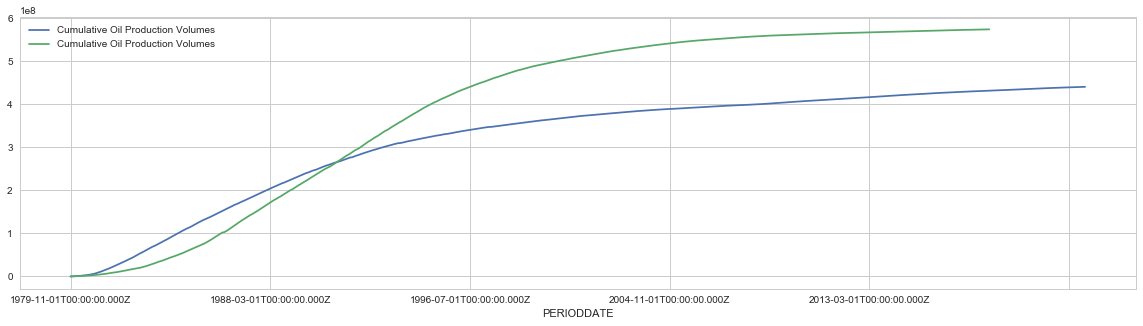

In [45]:
df_UK_biggest=df_UK_total[df_UK_total['Oil Production Volumes']==df_UK_total['Oil Production Volumes'].max()]
display(df_UK_biggest)

df_Nor_biggest=df_Nor_total[df_Nor_total['Oil Production Volumes']==df_Nor_total['Oil Production Volumes'].max()]
display(df_Nor_biggest)

ax = df_UK[df_UK.FIELDNAME==df_UK_biggest.index[0].plot(x='PERIODDATE', y='Cumulative Oil Production Volumes', 
                                                             label='something else', figsize=(20,5))
df_Nor[df_Nor.FIELDNAME==df_Nor_biggest.index[0]].plot(x='PERIODDATE', y='Cumulative Oil Production Volumes', 
                                                            ax=ax, label='something else')


ax = df.plot(y='sin(x)', label='Sin(x)')
df.plot(y='cos(x)', label='SOs(x)', ax=ax)

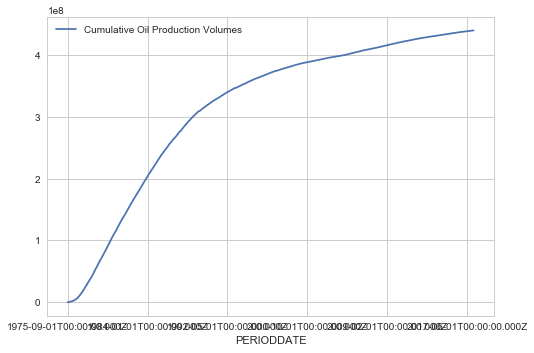

In [34]:
df_UK[df_UK.FIELDNAME==df_UK_biggest.index[0]][['Cumulative Oil Production Volumes','PERIODDATE']].plot(x='PERIODDATE', 
                                                                                                        label='something else', legend=True)



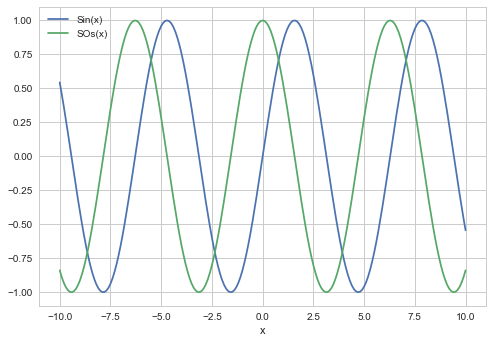

In [36]:
x = np.linspace(-10,10,201)
y, z = np.sin(x), np.cos(x)
x, y, z= pd.Series(x), pd.Series(y), pd.Series(z)
df = pd.concat([x, y, z], axis=1)
df.columns = ['x', 'sin(x)', 'cos(x)']
df = df.set_index('x')
ax = df.plot(y='sin(x)', label='Sin(x)')
df.plot(y='cos(x)', label='SOs(x)', ax=ax)
plt.show()